## 제주 빅데이터 경진대회
## _____ (팀명)
## 2020년 월 일 (제출날짜)

1. 본 코드는 대회 참가를 돕고자 단순 예시를 작성한 것으로 참고용으로 사용바랍니다.
2. 본 코드는 자유롭게 수정하여 사용 할 수 있습니다.

## 1. 라이브러리 가져오기
## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 1.0.5
Numpy : 1.18.5
Scikit-Learn : 0.23.1


Python 3.6.10 :: Anaconda, Inc.


## 2. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [3]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [4]:
# 날짜 처리
data = pd.read_csv('data/201901-202003.csv')
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [5]:
# 데이터 정제
df = data.copy()

# season
df.loc[(df['month']>=3)&(df['month']<=5) ,'season'] = '봄'
df.loc[(df['month']>=6)&(df['month']<=8) ,'season'] = '여름'
df.loc[(df['month']>=9)&(df['month']<=11) ,'season'] = '가을'
df.loc[(df['month']>11),'season'] = '겨울'
df.loc[(df['month']<=2),'season'] = '겨울'

# visitor
df.loc[(df['CARD_SIDO_NM'] == df['HOM_SIDO_NM']), 'visitor'] = '거주자'
df.loc[(df['CARD_SIDO_NM'] != df['HOM_SIDO_NM']), 'visitor'] = '여행객'

# covid
# covid = ['관광 민예품 및 선물용품 소매업','그외 기타 분류안된 오락관련 서비스업','그외 기타 스포츠시설 운영업','기타 대형 종합 소매업','기타 수상오락 서비스업','기타 외국식 음식점업','기타 주점업','내항 여객 운송업','마사지업','면세점','버스 운송업','비알콜 음료점업','서양식 음식점업','스포츠 및 레크레이션 용품 임대업','여관업','여행사업','욕탕업','일반유흥 주점업','일식 음식점업','자동차 임대업','전시 및 행사 대행업','정기 항공 운송업','중식 음식점업','차량용 가스 충전업','차량용 주유소 운영업','체인화 편의점','택시 운송업','피자 햄버거 샌드위치 및 유사 음식점업','한식 음식점업','호텔업','화장품 및 방향제 소매업','휴양콘도 운영업']
# df['covid'] = '코로나 영향 없음'
# for virus in covid:
#     df.loc[(df['STD_CLSS_NM'] == virus),'covid'] = '코로나 영향있음'

# 취소/단골
df['gap']= df['CNT'] - df['CSTMR_CNT']
df.loc[df['gap'] <0,'mark'] = '취소있음'
df.loc[df['gap'] ==0,'mark'] = '고객다양'
df.loc[df['gap'] >0,'mark'] = '단골있음'
    
    
# 시군구 drop
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'gap'], axis=1)

df.head()

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,season,visitor,mark
0,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4,2019,1,겨울,거주자,고객다양
1,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8,2019,1,겨울,거주자,단골있음
2,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6,2019,1,겨울,거주자,고객다양
3,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5,2019,1,겨울,거주자,단골있음
4,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3,2019,1,겨울,거주자,고객다양


In [6]:
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month',
           'season','visitor','covid','mark']

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD','FLC', 'year', 'month',
           'season','visitor','mark']


df = df.groupby(columns).sum().reset_index(drop=False)

In [7]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

## 3. 탐색적 자료분석
## Exploratory Data Analysis

In [7]:
# 입력하세요.

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [8]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
#train_features = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
#train_target = np.log1p(train_num['AMT'])

In [9]:
x = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
y = np.log1p(train_num['AMT'])

In [10]:
k = int(len(x)*0.9)

In [11]:
x_train = x[:k]
y_train = y[:k]
x_val = x[k:]
y_val = y[k:]

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

In [13]:
import catboost as cb
from catboost import Pool, datasets, CatBoostRegressor
from sklearn import metrics  

In [36]:
# def rmsle_1(y_pred, data):
#     y_true = np.array(data.get_label())
#     score = np.sqrt(np.square(np.log1p(y_pred + 1)- np.log1p(y_ture + 1)).mean())
#     return 'rmsle', score, False

In [13]:
# def predict_and_score(dataset, labels):
#     pred = fit_model.predict(dataset)
#     mse = np.mean((pred - labels) ** 2)
#     rmse = np.sqrt(mse)
#     return pred, mse, rmse

In [18]:
model = CatBoostRegressor(iterations=10000,             # 반복횟수
                           learning_rate=0.05,          # 러닝레이트
                           l2_leaf_reg=3.5,             # L2 정규화 계수
                           depth=9,                     # 트리 깊이
                           rsm=0.98,                    # Random subspace method.
                           metric_period=1000,
                           loss_function= 'RMSE',      
                           eval_metric= 'RMSE',         # 성능 측정
                           use_best_model=True,
                           random_seed=42               # 랜덤시드 고정
                          ) 

In [ ]:
model.fit(x_train,y_train,eval_set=(x_val,y_val))

0:	learn: 13.1393932	test: 13.1466534	best: 13.1466534 (0)	total: 337ms	remaining: 28m 6s
1000:	learn: 1.0899522	test: 1.0943775	best: 1.0943775 (1000)	total: 17m 25s	remaining: 1h 9m 36s
2000:	learn: 0.9563830	test: 0.9627622	best: 0.9627622 (2000)	total: 34m 12s	remaining: 51m 16s
3000:	learn: 0.8939392	test: 0.9026017	best: 0.9026017 (3000)	total: 54m 38s	remaining: 36m 23s
4000:	learn: 0.8546565	test: 0.8655472	best: 0.8655472 (4000)	total: 1h 11m 51s	remaining: 17m 56s


In [15]:
import sklearn.externals
import joblib

file_name = 'catboost_9_MultiRMSE.pkl' 
joblib.dump(model, file_name) 

['catboost_0722.pkl']

In [16]:
import sklearn.externals
import joblib

file_name = 'catboost_9_MultiRMSE.pkl' 
load_model = joblib.load(file_name) 

Text(0.5, 0, 'Importance')

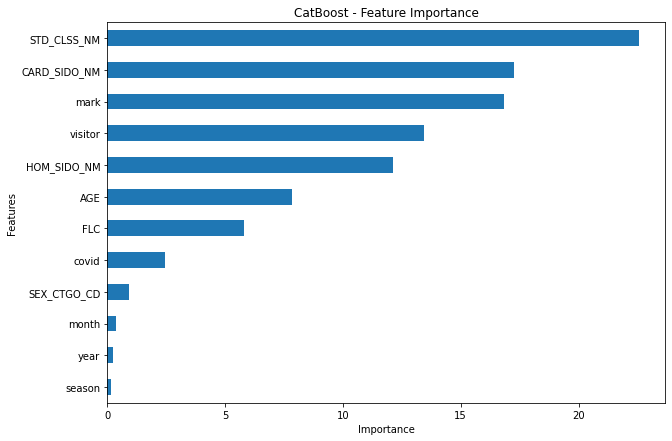

In [17]:
# feature importance

import matplotlib.pyplot as plt

fea_imp = pd.DataFrame({'imp': load_model.feature_importances_, 'col': x.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

## 6. 결과 및 결언
## Conclusion & Discussion

In [16]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]
seasons       = df_num['season'].unique()
visitors      = df_num['visitor'].unique()
#covids        = df_num['covid'].unique()
marks         = df_num['mark'].unique()


temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                for season in seasons:
                                    for visitor in visitors:
                                        #for covid in covids:
                                        for mark in marks:
                                            temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month,season,visitor,mark])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=x.columns)

In [17]:
# 예측
pred = load_model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [18]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [19]:
# 제출 파일 만들기
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('catboost_9_MultiRMSE.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,4.714571e+09
1,202004,강원,골프장 운영업,1.131327e+10
2,202004,강원,과실 및 채소 소매업,4.571501e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.803331e+09
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.923961e+09
